In [1]:
import numpy as np
from astropy import coordinates as coo
from astropy import units as u
import healpy as hp
import matplotlib.pyplot as plt
import multiprocessing as mp
from data_process import load_calculation_data, calculate_jackknife_variance

In [2]:
Nside_jack = 10

In [16]:
r_p, dat = load_calculation_data('../calculation_data/result_r=0.1_150_16_cmass_z_cut_CMB_lcut_2048_tree.npy', return_rp=True)
# r_p, dat = load_calculation_data('../calculation_data/result_r=0.1_150_16_cmass_z_cut_CMB_lcut_n_1024_tree.npy', return_rp=True)
dat_r = load_calculation_data('../calculation_data/result_r=0.1_150_16_random_cmass_CMB_lcut_2048_tree.npy')
# dat_r = load_calculation_data('../calculation_data/result_r=0.1_150_16_random_cmass_CMB_lcut_n_1024_tree.npy')
value = dat[0]
weight = dat[1]
value_r = dat_r[0]
weight_r = dat_r[1]
cmass = np.load('/uufs/astro.utah.edu/common/home/u6060319/quasar-CMBlening/catalogue/cmass_z_cut.npy')
Nquas = len(cmass)
c = coo.SkyCoord(ra=cmass['ra']*u.degree, dec=cmass['dec']*u.degree)

l = c.galactic.l.to(u.rad).value
b = c.galactic.b.to(u.rad).value
pos = hp.ang2vec(theta=np.pi/2-b, phi=l)
pix = hp.ang2pix(Nside_jack, theta=np.pi/2-b, phi=l)

print('finish loading cmass catalogue')

random = np.load('/uufs/astro.utah.edu/common/home/u6060319/quasar-CMBlening/catalogue/random_cmass.npy')
Nquas = len(random)
c = coo.SkyCoord(ra=random['ra']*u.degree, dec=random['dec']*u.degree)
l = c.galactic.l.to(u.rad).value
b = c.galactic.b.to(u.rad).value
pix_r = hp.ang2pix(Nside_jack, theta=np.pi/2-b, phi=l)

print('finish loading random sample')

finish loading cmass catalogue
finish loading random sample


## cmass sample

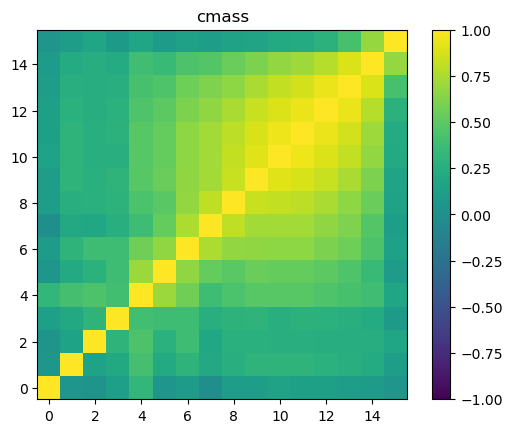

In [4]:
sampler_g = calculate_jackknife_variance(value, weight, pix, norm_cov=True)

plt.imshow(sampler_g['cov'], origin='lower', vmin=-1, vmax=1)
plt.colorbar()
plt.title('cmass')
plt.show()

## random sample

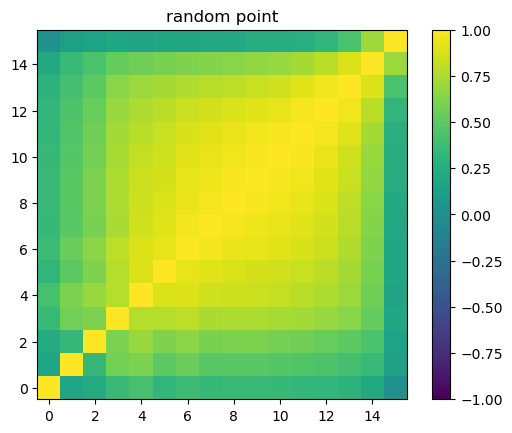

In [5]:
sampler_r = calculate_jackknife_variance(value_r, weight_r, pix_r, norm_cov=True)

plt.imshow(sampler_r['cov'], origin='lower', vmin=-1, vmax=1)
plt.title('random point')
plt.colorbar()
plt.show()

## cmass - random

In [17]:
sampler_sub = calculate_jackknife_variance(value, weight, pix, value_r, weight_r, pix_r, norm_cov=True)

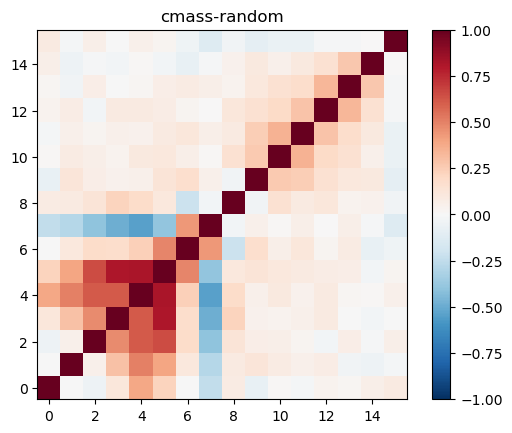

In [18]:
plt.imshow(sampler_sub['cov'], origin='lower', vmin=-1, vmax=1, cmap='RdBu_r')
plt.title('cmass-random')
plt.colorbar()
plt.show()

In [19]:
np.savetxt(f'./results/cmass_cmb_lcut_2048', np.c_[r_p, sampler_sub['mean'], sampler_sub['std']])

[]

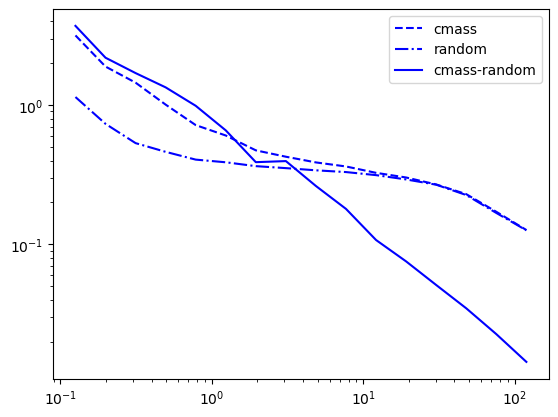

In [26]:
plt.plot(r_p, sampler_g['std'], '--', color='blue', label='cmass')
plt.plot(r_p, sampler_r['std'], '-.', color='blue', label='random')
plt.plot(r_p, sampler_sub['std'], '-', color='blue', label='cmass-random')
plt.legend()
plt.loglog()

## signal

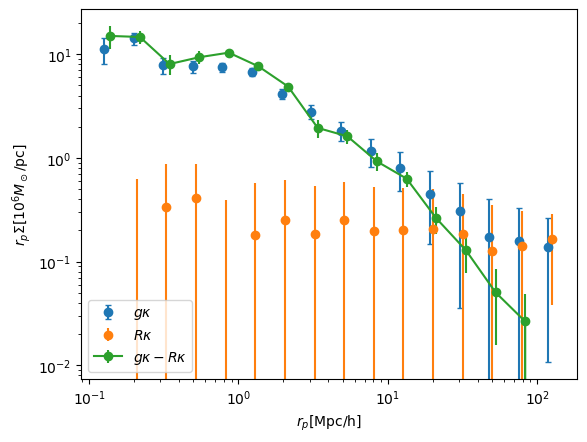

In [20]:
plt.errorbar(r_p, sampler_g['mean'], sampler_g['std'], capsize=2, fmt='o', label='$g\\kappa$')
plt.errorbar(r_p*1.05, sampler_r['mean'], sampler_r['std'], label='$R\\kappa$', fmt='o')
plt.errorbar(r_p*1.05*1.05, sampler_sub['mean'], sampler_sub['std'], label='$g\\kappa-R\\kappa$', fmt='-o')
plt.loglog()
plt.xlabel('$r_p[\\mathrm{Mpc/h}]$')
plt.ylabel('$r_p\\Sigma[10^6 M_\\odot/\\mathrm{pc}]$')
plt.legend(loc='lower left')
# plt.savefig('./fig/cmass_random_l_cut.jpg')
plt.show()

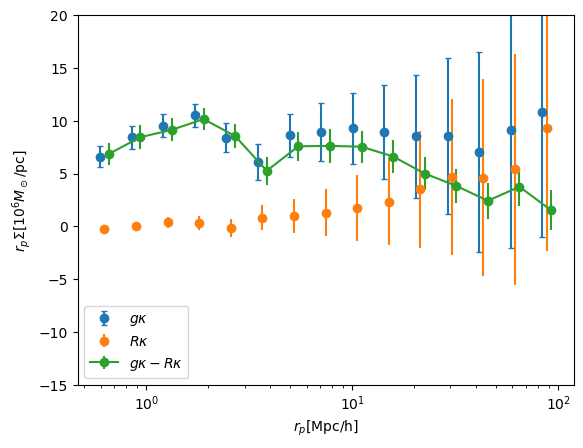

In [20]:
plt.errorbar(r_p, r_p*sampler_g['mean'], r_p*sampler_g['std'], capsize=2, fmt='o', label='$g\\kappa$')
plt.errorbar(r_p*1.05, r_p*sampler_r['mean'], r_p*sampler_r['std'], label='$R\\kappa$', fmt='o')
plt.errorbar(r_p*1.05*1.05, r_p*sampler_sub['mean'], r_p*sampler_sub['std'], label='$g\\kappa-R\\kappa$', fmt='-o')
plt.semilogx()
plt.xlabel('$r_p[\\mathrm{Mpc/h}]$')
plt.ylabel('$r_p\\Sigma[10^6 M_\\odot/\\mathrm{pc}]$')
plt.ylim(-15, 20)
plt.legend(loc='lower left')
# plt.savefig('./fig/cmass_random_l_cut.jpg')
plt.show()